In [85]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_table("SALT-CREEK.dat")
df.head()
#GR ->  Gamma Ray Log
#LLD -> Laterolog Deep
#MSFL -> Micro Resistivity
#DT -> Sonic Log
#RHOB -> Density log
#NPHI -> Neutron density
#PEF -> photoelectric absorption
#POR -> porosity
#Kg -> permeability

,GR,log10(LLD),log10(MSFL),DT,RHOB,NPHI,PEF,POR,Kg,ln(Kg)
0,7.86,2.0646,1.6133,63.19,2.50,0.10,8.48,12.5,15.802,2.760
1,7.82,2.0646,1.4921,62.00,2.52,0.11,9.70,12.7,11.415,2.435
2,7.75,2.1020,1.6712,61.75,2.53,0.10,7.48,7.7,1.788,0.581
3,7.72,2.1478,1.6262,60.31,2.53,0.09,7.82,11.8,10.618,2.363
4,8.13,2.1537,1.7102,60.31,2.53,0.09,8.13,10.4,5.654,1.732


In [87]:
df.dtypes

GR             float64
log10(LLD)     float64
log10(MSFL)    float64
DT             float64
RHOB           float64
NPHI           float64
PEF            float64
POR            float64
Kg             float64
ln(Kg)         float64
dtype: object

In [88]:
print(df.isnull().sum())
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape, df.shape

GR             0
log10(LLD)     0
log10(MSFL)    0
DT             0
RHOB           0
NPHI           0
PEF            0
POR            0
Kg             0
ln(Kg)         0
dtype: int64


((403, 10), (403, 10))

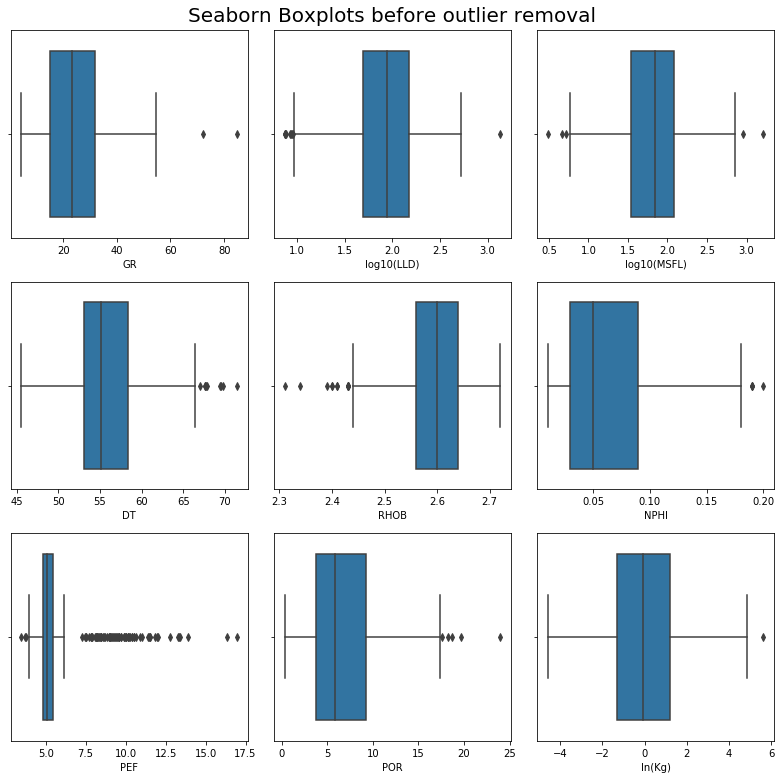

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(11,11))
fig.suptitle('Seaborn Boxplots before outlier removal', fontsize=20)
sns.boxplot(x=df['GR'], ax=axes[0,0])
sns.boxplot(x=df['log10(LLD)'], ax=axes[0,1])
sns.boxplot(x=df['log10(MSFL)'], ax=axes[0,2])
sns.boxplot(x=df['DT'], ax=axes[1,0])
sns.boxplot(x=df['RHOB'], ax=axes[1,1])
sns.boxplot(x=df['NPHI'], ax=axes[1,2])
sns.boxplot(x=df['PEF'], ax=axes[2,0])
sns.boxplot(x=df['POR'], ax=axes[2,1])
sns.boxplot(x=df['ln(Kg)'], ax=axes[2,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [90]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3+1.5 * IQR))).any(axis=1)]
df.shape
kg=df['Kg']
df=df.drop(['Kg'], axis=1)
perm=df['ln(Kg)'].values
perm=np.reshape(perm,(-1,1))
#print(IQR)
df.shape

(286, 9)

In [91]:
#sns.pairplot(df)

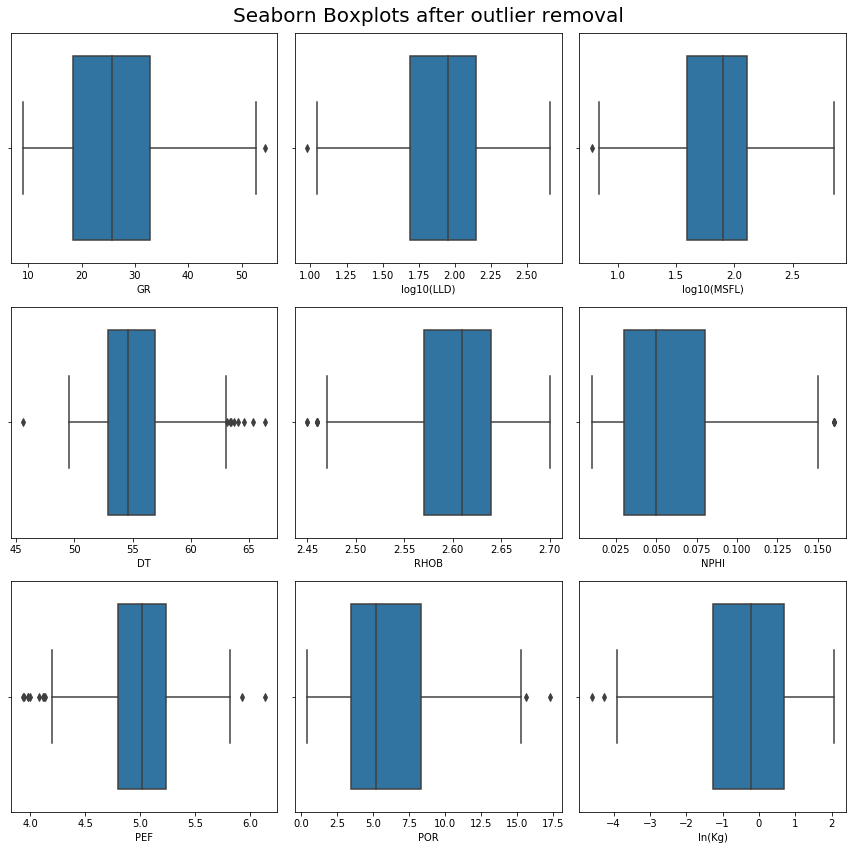

In [92]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle('Seaborn Boxplots after outlier removal', fontsize=20)
sns.boxplot(x=df['GR'], ax=axes[0,0])
sns.boxplot(x=df['log10(LLD)'], ax=axes[0,1])
sns.boxplot(x=df['log10(MSFL)'], ax=axes[0,2])
sns.boxplot(x=df['DT'], ax=axes[1,0])
sns.boxplot(x=df['RHOB'], ax=axes[1,1])
sns.boxplot(x=df['NPHI'], ax=axes[1,2])
sns.boxplot(x=df['PEF'], ax=axes[2,0])
sns.boxplot(x=df['POR'], ax=axes[2,1])
sns.boxplot(x=df['ln(Kg)'], ax=axes[2,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)

# PCA

In [93]:
normalized_df=((df-df.mean())/df.std()).drop(['ln(Kg)','POR'], axis=1)
normalized_kg=((kg-kg.mean())/kg.std())
normalized_df.head()

,GR,log10(LLD),log10(MSFL),DT,RHOB,NPHI,PEF
70,0.224763,0.262858,1.581200,-0.003686,-0.533711,0.238198,-0.169010
71,-0.725929,0.693160,0.559589,1.240764,-0.709768,0.768349,-0.116154
72,-0.698179,0.349769,-0.062809,1.968113,-1.413996,1.563577,-0.591860
73,-0.565596,0.215452,-0.260770,1.843100,-1.766110,1.563577,0.068842
74,-0.668373,0.276836,-0.235820,1.541932,-1.061882,1.298501,0.385979


In [94]:
z = normalized_df.copy()
C= z.cov()
C.head()

,GR,log10(LLD),log10(MSFL),DT,RHOB,NPHI,PEF
GR,1.000000,0.080340,0.218780,-0.279611,0.258439,-0.346985,-0.134951
log10(LLD),0.080340,1.000000,0.546431,-0.556974,0.548034,-0.475477,0.408862
log10(MSFL),0.218780,0.546431,1.000000,-0.608738,0.550384,-0.576353,0.213997
DT,-0.279611,-0.556974,-0.608738,1.000000,-0.868038,0.852913,-0.290574
RHOB,0.258439,0.548034,0.550384,-0.868038,1.000000,-0.816929,0.262803


In [95]:
lam_1d, q = np.linalg.eig(C)
lam = np.diag(lam_1d)
qT = q.transpose()
#print(q , '\n\n', lam)

#reconstruct covariance matrix C, just to visualize
C_reconstruct = q.dot(lam).dot(qT)
#print('\n\n', C_reconstruct)

In [96]:
lam_sort = sorted(lam_1d, reverse=True)
neglam= [-x for x in lam_sort]
q_sort = q[:, np.argsort(neglam)] #sort q according to lam_sort
#print (q_sort)

numer = 0
denom=sum(lam_sort)
count=0
PC_values=[]
PC_ratio=[]
for i in lam_sort:
    numer=numer+i
    count += 1
    print('The first', count, 'Principal Components represent', "{:.1f}".format(numer/denom*100), '% of the data')
    PC_values.append(count)
    PC_ratio.append(numer/denom)

The first 1 Principal Components represent 54.5 % of the data
The first 2 Principal Components represent 72.1 % of the data
The first 3 Principal Components represent 81.5 % of the data
The first 4 Principal Components represent 90.0 % of the data
The first 5 Principal Components represent 95.8 % of the data
The first 6 Principal Components represent 98.3 % of the data
The first 7 Principal Components represent 100.0 % of the data


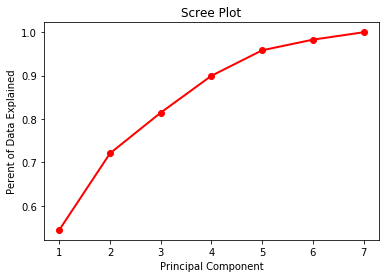

In [97]:
plt.plot(PC_values, PC_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Perent of Data Explained')
plt.show()

In [98]:
sorted(range(len(lam_1d)), key=lambda k: lam_1d[k], reverse=True)
#Return the indexes of the lamda array in order of highest value to lowest value

[0, 1, 5, 6, 4, 2, 3]

In [99]:
#We will use the first 4 principal components

In [100]:
projection=q[:,[0,1,5,6]]
#print(projection)
z_pca=z.dot(projection).values #adding .values to the end makes this a numpy array
z_pca.shape

(286, 4)

# K means

In [101]:
from sklearn.cluster import KMeans
clusters=KMeans(n_clusters=6)
clusters.fit(z_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

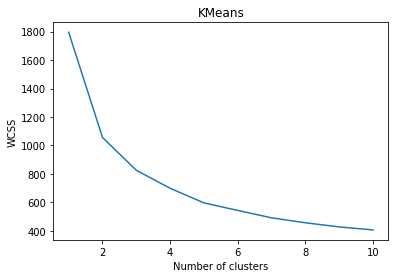

In [102]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(z_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0,0.5,'Second Principal Component')

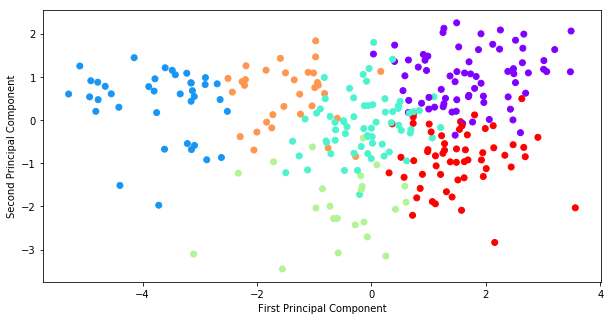

In [103]:
plt.figure(figsize=(10,5))
plt.scatter(z_pca[:,0],z_pca[:,1],c=clusters.labels_,cmap=plt.cm.get_cmap('rainbow'))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Random Forests

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [105]:
perm = np.reshape(perm,(-1,1))
#all_data = np.append(z_pca, kmeans.label_,1)
x=z_pca
x2=df.drop(['ln(Kg)','POR'], axis=1).values
y1=clusters.labels_ #where -1 infers the size of the new dimension from the size of the input array.
y2=normalized_kg.values

### Classification Forest

In [130]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(x):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)


In [131]:
dtr = RandomForestClassifier(n_estimators=100)
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
estimator=dtr.estimators_[50]

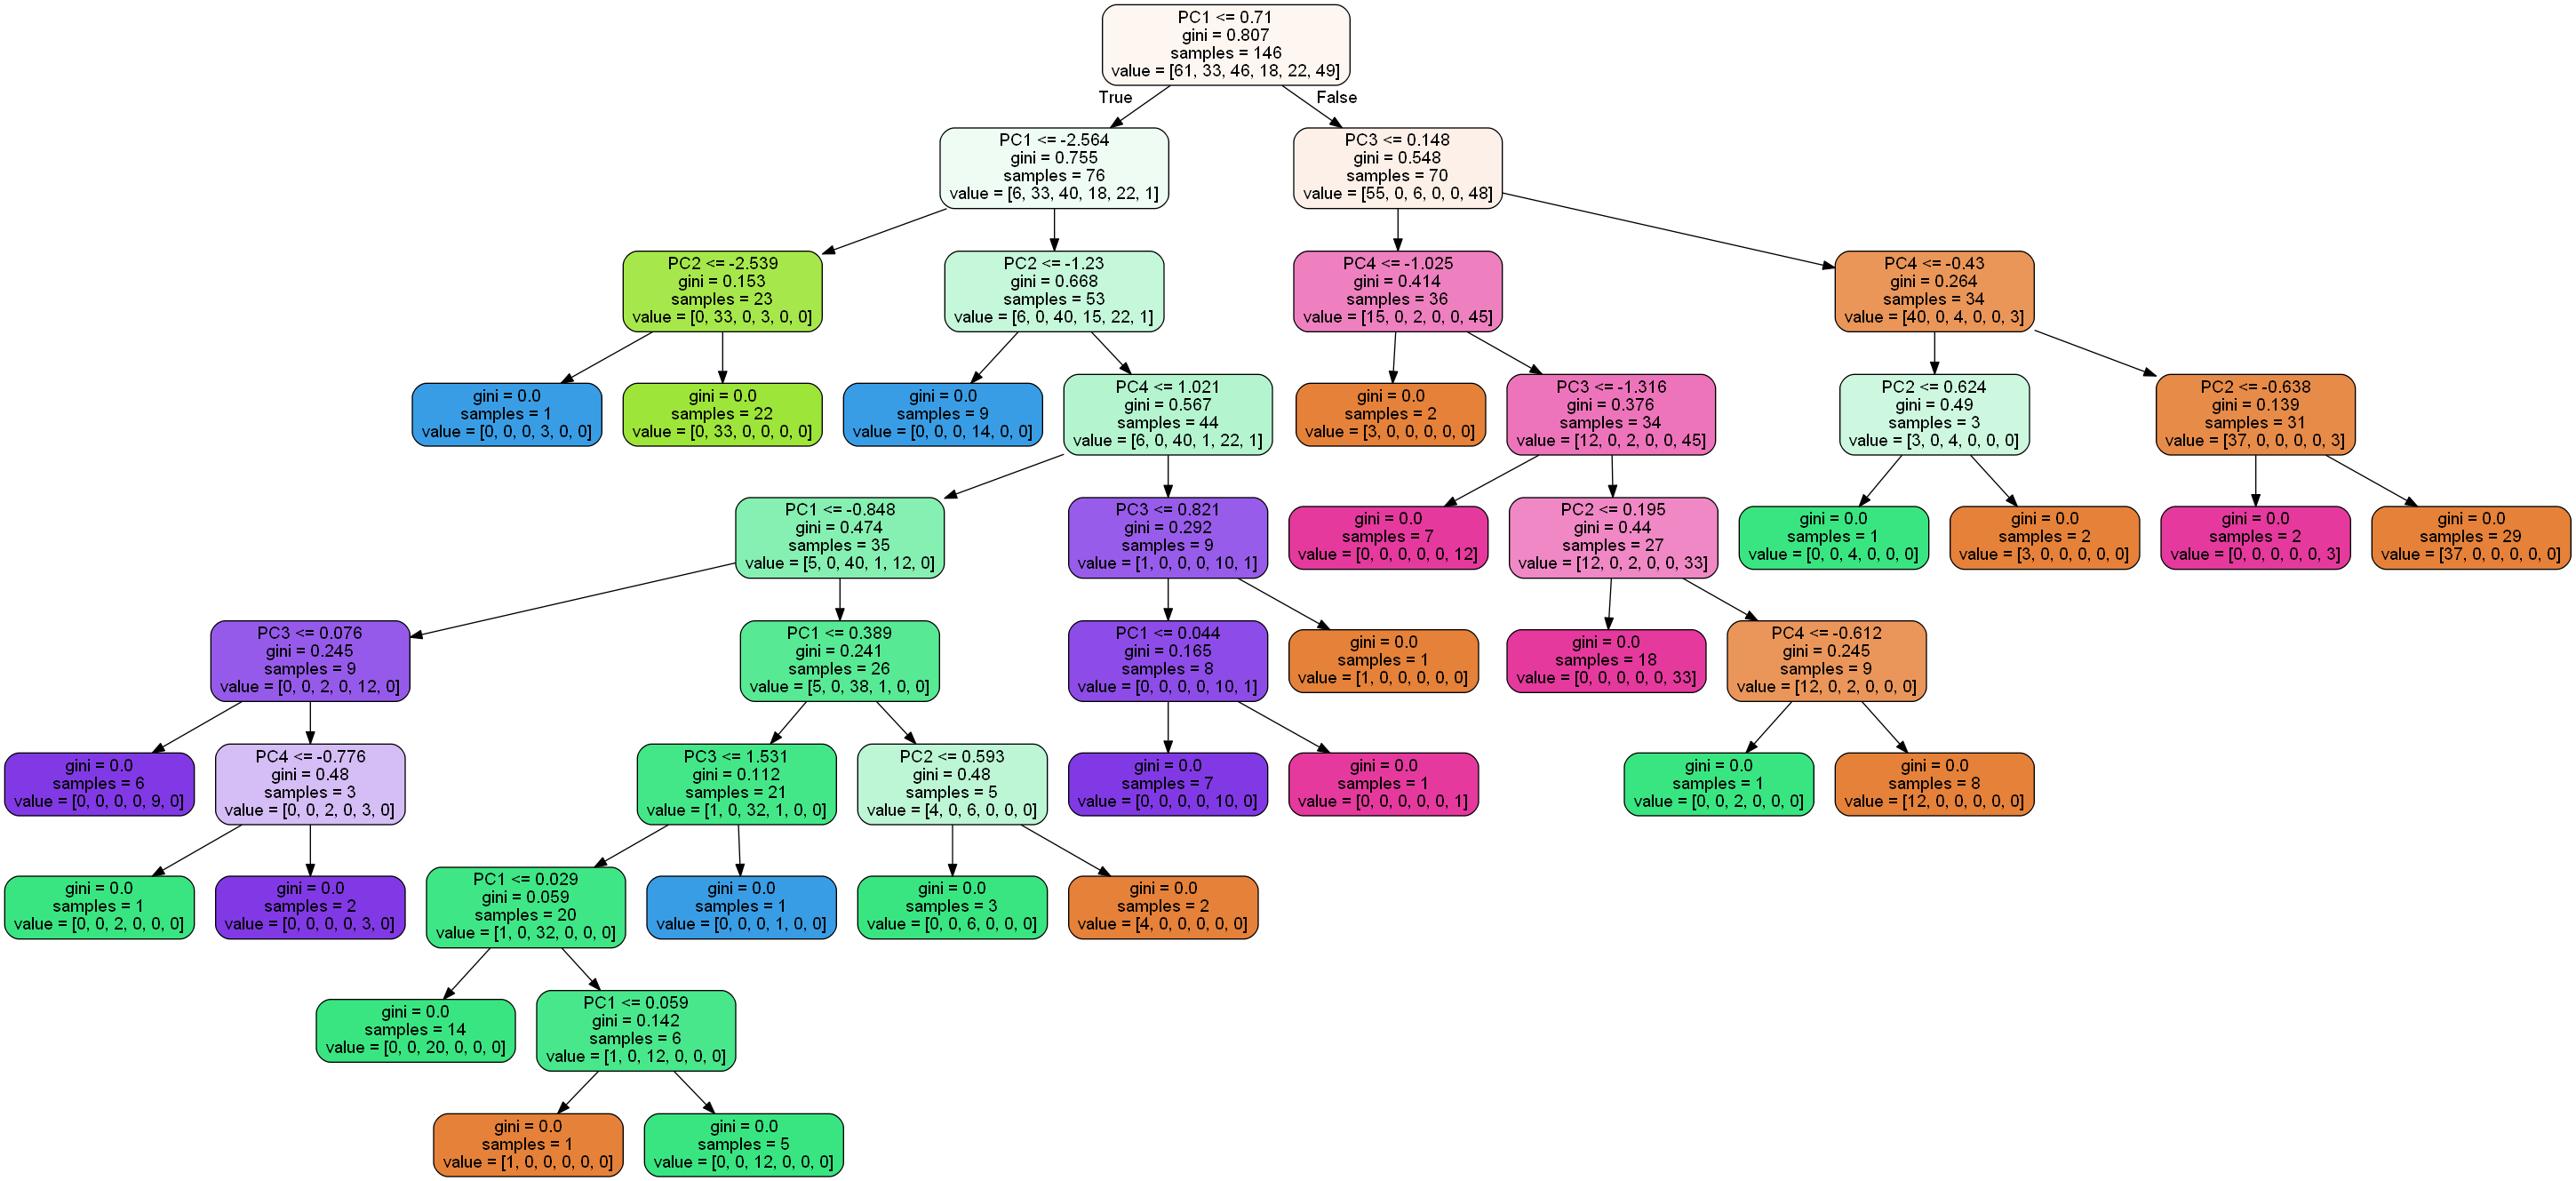

In [132]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz 
import pydotplus
pc_columns = list(['PC1','PC2','PC3','PC4'])
dot_data = StringIO()  
export_graphviz(estimator, out_file=dot_data, feature_names=pc_columns, filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")
print(accuracy_score(y_test, y_pred),"\n") 

[[ 6  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0 18  0  1  1]
 [ 0  0  2  6  1  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 14]] 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      1.00      1.00         7
          2       0.90      0.90      0.90        20
          3       1.00      0.67      0.80         9
          4       0.33      1.00      0.50         1
          5       0.93      1.00      0.97        14

avg / total       0.94      0.91      0.92        57
 

0.9122807017543859 



### Regression Forest

In [111]:
x2=z_pca
#x2=df.drop(['ln(Kg)','POR'], axis=1).values
y2=kg.values #where -1 infers the size of the new dimension from the size of the input array.
#y2=normalized_kg.values

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x2) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(x2):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    x_train, x_test = x2[train_index], x2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)


In [118]:
dtr = RandomForestRegressor(n_estimators=100, max_depth=3)
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
estimator=dtr.estimators_[50]

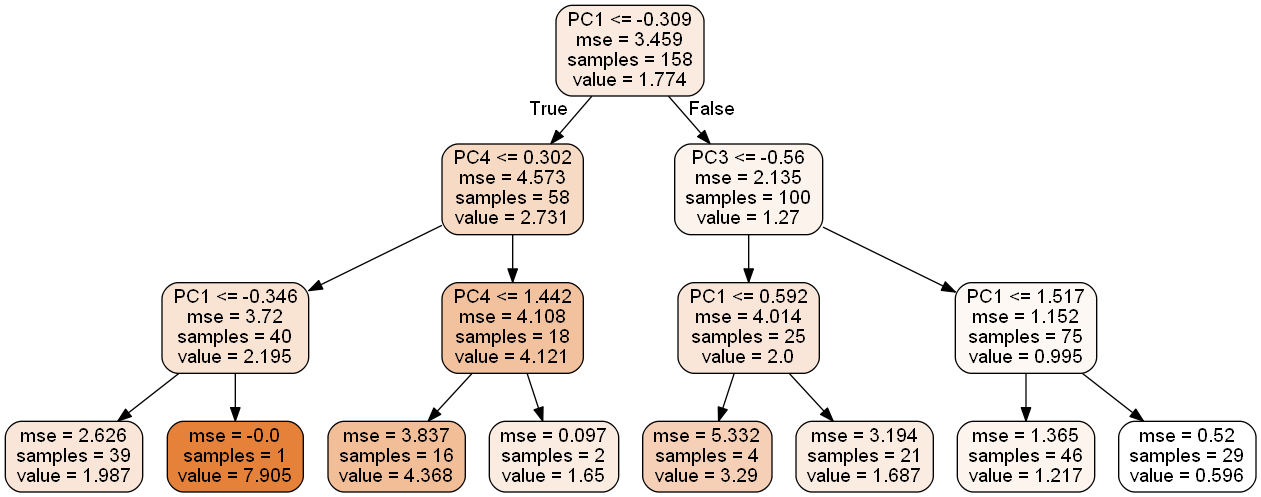

In [119]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz 
import pydotplus
df_columns = list(['PC1','PC2','PC3','PC4'])
#df_columns = list(['GR','log10(LLD)','log10(MSFL)','DT', 'RHOB', 'NPHI', 'PEF'])
dot_data = StringIO()  
export_graphviz(estimator, out_file=dot_data, feature_names=df_columns, filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [120]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.2832840096763443
Mean Squared Error: 2.1348777352157553
Root Mean Squared Error: 1.4611220808733798
R Squared Score is: -0.15761743310779153


### Random Testing of stuff

In [34]:
x2=z_pca#[:,0]
#x2=x2.reshape(-1, 1)
#y2=normalized_kg.values
y2=kg.values

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x2) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(x2):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    x_train, x_test = x2[train_index], x2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)


In [35]:
dtr = RandomForestRegressor(n_estimators=100, max_depth=5)
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
estimator=dtr.estimators_[50]

In [122]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:      %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:       %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:  %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:       %.3f' % r2_score(y_test, y_pred))

Mean Absolute Error:      1.283
Mean Squared Error:       2.135
Root Mean Squared Error:  1.461
R Squared Score is:       -0.158


In [37]:
for importance, name in sorted(zip(dtr.feature_importances_, pc_columns),reverse=True):
    print (name, importance)

PC1 0.41180343684654536
PC4 0.2439975288272791
PC2 0.1902045725315488
PC3 0.1539944617946266


In [38]:
y_pred = model.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R Squared Score is:', r2_score(y_train, y_pred))

Mean Absolute Error: 0.8826373502613024
Mean Squared Error: 1.3262187943311068
Root Mean Squared Error: 1.1516157320613098
R Squared Score is: 0.5907428565827875


In [39]:
clusters.labels_

array([3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 1, 0, 0, 4, 4, 3, 3, 4, 4, 1, 1, 1, 4, 1,
       1, 1, 3, 1, 1, 5, 4, 5, 4, 4, 4, 2, 2, 2, 2, 5, 3, 3, 3, 3, 3, 5,
       5, 4, 4, 4, 1, 0, 0, 0, 0, 1, 1, 4, 1, 1, 3, 3, 1, 3, 3, 3, 4, 4,
       0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 0, 0, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 4, 4, 3, 1, 4, 1, 4,
       1, 3, 3, 1, 1, 4, 4, 1, 1, 1, 1, 5, 2, 4, 4, 5, 3, 3, 4, 5, 5, 5,
       5, 5, 5, 1, 1, 3, 5, 4, 1, 0, 2, 2, 2, 1, 4, 1, 1, 1, 0, 4, 1, 1,
       1, 1, 1, 1, 1, 4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 1, 1, 1, 3, 3, 5, 1, 1, 5, 5, 5, 5, 5, 5, 3, 5,
       5, 4, 3, 3, 3, 3, 1, 4, 5, 4, 4, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4])

In [40]:
y_pred

array([1.16515409, 2.4155303 , 2.72840389, 4.50374169, 3.76271716,
       2.26621284, 4.99016611, 4.35228201, 1.09001694, 1.14839124,
       3.40010662, 1.24098639, 1.28908354, 1.28804528, 1.89318191,
       2.47010699, 1.25782709, 1.05196564, 1.36920327, 1.30020708,
       1.24578144, 1.04099282, 1.13217775, 1.20258839, 0.92515299,
       0.86758649, 1.40862802, 1.10860227, 1.29683135, 0.98469935,
       0.60351176, 1.65493074, 1.59719743, 1.14929439, 1.41781603,
       1.5852148 , 1.31662799, 1.11958234, 1.07800474, 1.13276898,
       1.05405168, 1.20886798, 1.35602031, 0.79655813, 0.64999162,
       1.2718663 , 1.04279775, 0.98078268, 2.9931922 , 0.97781381,
       1.40167303, 1.1686595 , 1.46857699, 1.60551569, 1.16091855,
       1.70338856, 3.62156912, 1.59748249, 1.79380633, 1.96999994,
       1.48803548, 3.43547635, 3.53328426, 2.50809   , 1.3135374 ,
       3.56973767, 2.58393557, 1.54219345, 1.93032181, 1.67454528,
       1.23022245, 1.35059552, 2.22139207, 1.76214657, 2.57096

C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Month=1, Predicted=284.570394, Expected=339.700000
Month=2, Predicted=373.343111, Expected=440.400000
Month=3, Predicted=373.343289, Expected=315.900000
Month=4, Predicted=393.140886, Expected=439.300000
Month=5, Predicted=331.187594, Expected=401.300000
Month=6, Predicted=443.482469, Expected=437.400000
Month=7, Predicted=423.157074, Expected=575.500000
Month=8, Predicted=491.242054, Expected=407.600000
Month=9, Predicted=488.976236, Expected=682.000000
Month=10, Predicted=407.343632, Expected=475.300000
Month=11, Predicted=441.752750, Expected=581.300000
Month=12, Predicted=395.115107, Expected=646.900000
Test RMSE: 120.024


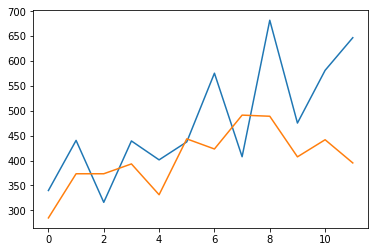

In [123]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 2000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

In [124]:
P_F_14 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-14', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_12 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-12', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)

In [125]:
P_F_14_v2 =P_F_14.rename(columns={'Oil Rate SC - Daily (m³/day)': 'Daily_Oil_Rate'})#, 'Cumulative Oil SC (m³)': 'Cum_Oil'})
P_F_12_v2 =P_F_12.rename(columns={'Oil Rate SC - Daily (m³/day)': 'Daily_Oil_Rate'})
P_F_14_v3 = P_F_14_v2[P_F_14_v2.Daily_Oil_Rate != 0]
P_F_12_v3 = P_F_12_v2[P_F_12_v2.Daily_Oil_Rate != 0] #df3a
P_F_12_v3.size

3003

In [126]:
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# load dataset
series=P_F_14_v3
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-500], supervised_values[-500:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 



C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [127]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 200, 4)

Test RMSE: 12.398


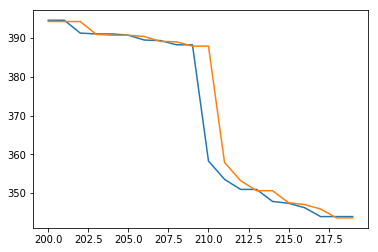

In [139]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-500:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(range((200),(220)),raw_values[-480:-460])
pyplot.plot(range((200),(220)),predictions[-480:-460])
pyplot.show()

#pyplot.plot(range((size+200),(size+210)),testf[(size+200):(size+210)], label='Test Data')
#pyplot.plot(range((size+200),(size+210)),predictionsi[200:210], label='LSTM Forecast')